# Lab 1- Introduction to Deep Learning


In [ ]:
# Import necessary libraries

# Utilities
import numpy as np
import matplotlib.pyplot as plt

# Deep learning libraries
import tensorflow as tf
from tensorflow import keras

## Data loading: Fashion MNIST 

In [ ]:
# Get the Fashion MNIST dataset, built-in data on keras

# Download the data
fashion_mnist = tf.keras.datasets.fashion_mnist

# Load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Check the dimensionality of the data
print(f'Training set: Input {x_train.shape}, Output{y_train.shape}')
print(f'Test set: Input {x_test.shape}, Output{y_test.shape}')

Training set: Input (60000, 28, 28), Output(60000,)
Test set: Input (10000, 28, 28), Output(10000,)


In [ ]:
# Inspecting the data

print(x_train.max(), x_train.min())

255 0


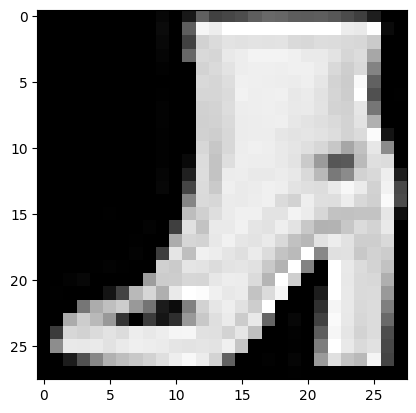

In [ ]:
# Showing an image of the Training set

plt.imshow(x_train[88])
plt.show()

### Normalize images

We would like our input data to lie in the interval $[0, 1]$. If our data does not lie in this interval, we can transform it as:

$$
x' = \frac{x - x_{min}}{x_{max}-x_{min}}
$$

Where $x_{min} = \min(x)$, $x_{max} = \max(x)$. Note that $x'$ always lies in the interval $[0, 1]$.

Also called **min-max feature scaling**:

In [ ]:
# Normalization function of the data, 
# in order for them to lie in the interval [0,1]
# exploiting the lambda function

normalize_data = lambda X: (X-X.min())/(X.max()-X.min())

'''
lambda function just like:
def normalize_data(X):
  return (X-X.min())/(X.max()-X.min())
'''

'\nlambda function just like:\ndef normalize_data(X):\n  return (X-X.min())/(X.max()-X.min())\n'

In [ ]:
print(f'Min and max of the training set before normalization: [{x_train.min()}, {x_train.max()}]')
print(f'Min and max of the test set before normalization: [{x_test.min()}, {x_test.max()}]')

x_train = normalize_data(x_train)
x_test = normalize_data(x_test)

print('\n')
print(f'Min and max of the training set after normalization: [{x_train.min()}, {x_train.max()}]')
print(f'Min and max of the test set after normalization: [{x_test.min()}, {x_test.max()}]')

Min and max of the training set before normalization: [0, 255]
Min and max of the test set before normalization: [0, 255]


Min and max of the training set after normalization: [0.0, 1.0]
Min and max of the test set after normalization: [0.0, 1.0]


In [ ]:
# Inspect the labels
print(np.unique(y_train))

# Encode these categories for the model 
# to understand better what it has to do

[0 1 2 3 4 5 6 7 8 9]


### To categorical mapping of labels

In [ ]:
# Transform the y into a vector which is easily understandable from the network, 
# one-hot encoding the y.

from keras.utils import to_categorical

print(f'y[0]: {y_train[0]}')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f'y[0] after one-hot enconing: {y_train[0]}')

y[0]: 9
y[0] after one-hot enconing: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Model

#### At first we loaded the data, now we can build the model.

In [ ]:
# Importing the models and the layers we are going to need

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

The simplest possible layer is the **Dense** layer, which is the fully-connected layer describing the operation $\sigma(Ax + b)$, where $A, b$ are learnable parameters, $A$ is a full matrix, and $\sigma$ is the activation function. Since **Dense** layers applies to vectors (not images), we first need to flatten our data. This can be done either via the **Flatten** layer or via the **Reshape** layer. Moreover, every model must begin with an **Input** layer, that describes the type of data our model will expect as input.

#### At this point we have to ways to define models in **Tensorflow**: the *Sequencial API* and the *Functional API*.

### Sequential API

In [ ]:
model = Sequential([Flatten(), 
                    Dense(64, activation = 'relu'), 
                    Dense(10, activation = 'softmax')]) 

### Functional API

In [ ]:
# Exactly the same thing as the Sequential API, 
# but written using Functional API

def build_model(input_shape, output_shape):

  input = Input(input_shape)
  flatten = Flatten()(input)

  dense_1 = Dense(64, activation = 'relu')(flatten)
  dense_2 = Dense(output_shape, activation='softmax')(dense_1)

  model = Model(inputs= input, outputs=dense_2)

  # Visualize summary of the newly created Model
  model.summary()
  return model


The two implementations of the model are both correct and apparently equivalent. The *S.* is easier to implement, Tensorflow will do all the work, concatenating the layers to build the NN. The *F.* is harder, because it requires to define the list of the Layers and also the relationship between them. This allows the Funcitonal API to define architecture with complex relationships between Layers (impossible to do using the Sequential API). 

## Train the Model

In [ ]:
# Model with a matrix 28x28 as InputLayer 
# and a layer of length 10 as OutputLayer

model = build_model((28,28), 10)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


The first thing to do to train the model is **compile** it , *defining a loss function and an optimizer*. The loss function represents the 'distance' we want to minimize, and the optimizer the mean through which it is possible to minimize the loss function. 
In order to start the optimization of the loss function, first we initialize a random value. The most used in *Adam*, but can be also chosen optimizers like the SGD.


In [ ]:
# Compiling the Model, exploiting Adam optimizer 
# and loss function CrossEntropy.

model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics = 'accuracy')

Once the model is compiled, it can be *trained*, which can be done through the *fit* method. 
**The training works by minimizing the loss function via a sequence of parameters update.**

When using a variant of the SGD, e.g. *Adam*, the optimizer takes as input a batch of data. Consider a dataset of *N* elements, define a parameter *m*, called *
batch size*, and at each iteration, select a random subset of data from the enitre dataset, of *m* elements. Those subsets are named *batches*. Given a batch, the optimizer takes it as input and compute one step of the training algorithm. Then, once it has been used, the batch is removed from the original dataset. 
After all the dataset is been processed, we say that an **epoch** has been executed. Batch size and epochs are both passed as input to the *fit* method.

In [ ]:
# Saving the output of the training in a varibale named 'history'
# It contains a report of the behavior of the loss during the iterations.

history = model.fit(x_train, y_train, epochs = 10, validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.5365 - accuracy: 0.8134 - val_loss: 0.4396 - val_accuracy: 0.8372
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3987 - accuracy: 0.8578 - val_loss: 0.3724 - val_accuracy: 0.8627
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3574 - accuracy: 0.8710 - val_loss: 0.3604 - val_accuracy: 0.8715
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3322 - accuracy: 0.8795 - val_loss: 0.3597 - val_accuracy: 0.8740
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3139 - accuracy: 0.8872 - val_loss: 0.3412 - val_accuracy: 0.8778
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3008 - accuracy: 0.8908 - val_loss: 0.3333 - val_accuracy: 0.8803
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2855 - accuracy: 0.8957 - val_loss: 0.3214 - val_accuracy

The accuracy obtained at the end of the training is incredibly high wrt the first epoch.

In [ ]:
# Let's try the behavior when tested on the test set.

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3797 - accuracy: 0.8643


[0.37970131635665894, 0.864300012588501]

Let's see how to predict a single shape.

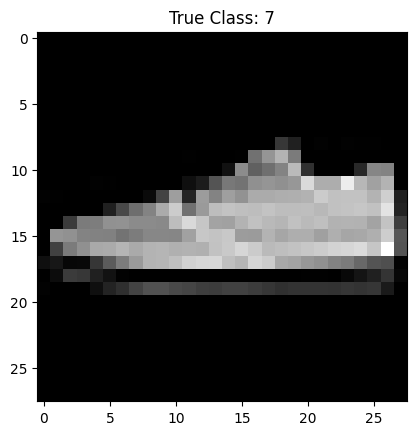

1/1 [==============================] - 0s 73ms/step
Predicted Class: 7


In [ ]:
# Get a single digit and the corresponding label from x_test

n = 60 # Index
x = x_test[n, :, :]
y = y_test[n]

# Visualize the shape
def show(x,y):
  if len(x.shape) == 3:
    x = x[:,:,0]
  elif len(x.shape) == 4:
    x = x[0,:,:,0]

  true_class = np.argmax(y)

  plt.imshow(x)
  plt.gray()
  plt.title(f'True Class: {true_class}')
  plt.show()

show(x, y)

# Exploit the network to predict the value for the digit

y_predict = model.predict(np.expand_dims(x,0))
shape_predicted = np.argmax(y_predict)

print(f'Predicted Class: {shape_predicted}')

In [ ]:
# Let's define a function in order to display 
# the behavior of accuracies and losses during the training,
# exploiting the 'history' that we saved before.

def display_history(history):
  mse_training = history.history['loss']
  acc_training = history.history['accuracy']

  mse_val = history.history['val_loss']
  acc_val = history.history['val_accuracy']

  # Visualize the behavior of the loss
  plt.plot(mse_training)
  plt.plot(mse_val)
  plt.grid()
  plt.title('Loss during training')
  plt.xlabel('Epoch')
  plt.legend(['Training', ' Validation'])
  plt.show()

  # Visualize the behavior of the accuracy
  plt.plot(acc_training)
  plt.plot(acc_val)
  plt.grid()
  plt.title('Accuracy during training')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'])
  plt.show()

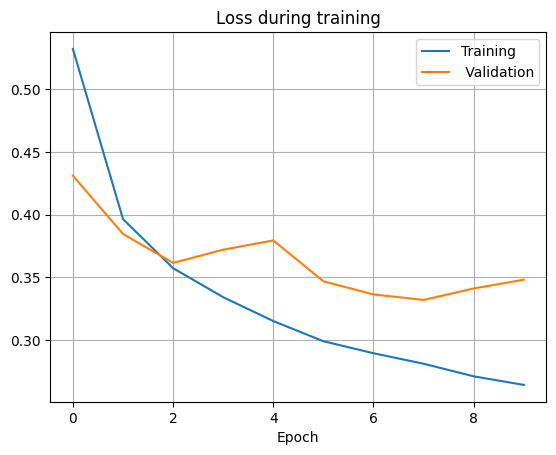

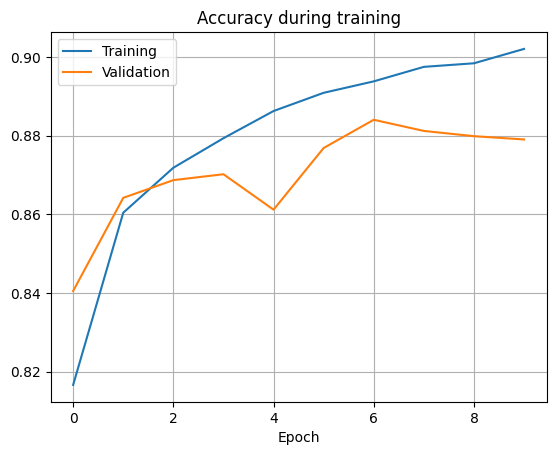

In [ ]:
display_history(history)